知道如何加载数据之后， 下一步就是创建模型并训练了。 这个过程大致可分为以下几步：
* 前向(forward)过程： 给定输入， 得到输出（包括loss）
* 计算梯度， 反向(backward)传播

现今的深度学习框架大多提供了可直接使用的优化器， 即反向传播过程一般不需要自己实现。 自己需要实现的主要是第一步。

In [1]:
import tensorflow as tf
assert tf.__version__ >= "2.0"
from tensorflow import keras
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

# 创建dataset
本文仍从创建dataset开始. 偷个小懒， 模型优化过程中不单独从50000张训练数据中分出部分作为验证数据集(validation set)， 直接以10000张test数据作为验证集。

In [2]:
import cifar_input
input_size = 32
train_batch_size = 100
eval_batch_size = 100
ds_train = cifar_input.get_dataset(is_training = True, input_size = input_size, batch_size = train_batch_size)
ds_eval = cifar_input.get_dataset(is_training = False, input_size = input_size, batch_size = eval_batch_size)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


# 创建模型
既然是demo， 就先从简单的开始， 实现一个MLP来完成cifar10的分类任务

In [3]:
input_tensor = keras.layers.Input(shape = (input_size, input_size, 3))
flatten = keras.layers.Flatten(input_shape = input_tensor.shape)(input_tensor)
hidden1 = keras.layers.Dense(30, activation="relu")(flatten)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
output_tensor = keras.layers.Dense(10, activation="softmax")(hidden2)
model = keras.models.Model(inputs=[input_tensor], outputs=[output_tensor])

keras提供了很方便的接口用于查看模型的总体情况：

In [4]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 30)                92190     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 93,430
Trainable params: 93,430
Non-trainable params: 0
_________________________________________________________________
None


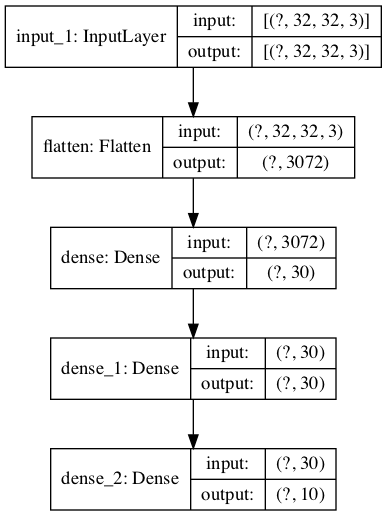

In [5]:
keras.utils.plot_model(model, "cifar10_mlp.png", show_shapes = True)

# 模型的训练和测试
对常见的分类模型， keras提供了简单易用的接口， 具体细节暂时放着， 之后再细细道来，现在先完成训练过程。

In [6]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])



In [7]:
model.fit(x = ds_train, epochs=30, validation_data = ds_eval)

Epoch 1/30
500/500 [==============================] - 16s 32ms/step - loss: 1.9968 - accuracy: 0.2802 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/30
500/500 [==============================] - 11s 22ms/step - loss: 1.8488 - accuracy: 0.3409 - val_loss: 1.8241 - val_accuracy: 0.3574
Epoch 3/30
500/500 [==============================] - 12s 23ms/step - loss: 1.7778 - accuracy: 0.3653 - val_loss: 1.7605 - val_accuracy: 0.3752
Epoch 4/30
500/500 [==============================] - 13s 25ms/step - loss: 1.7371 - accuracy: 0.3782 - val_loss: 1.7395 - val_accuracy: 0.3833
Epoch 5/30
500/500 [==============================] - 12s 25ms/step - loss: 1.7040 - accuracy: 0.3919 - val_loss: 1.7190 - val_accuracy: 0.3892
Epoch 6/30
500/500 [==============================] - 11s 23ms/step - loss: 1.6780 - accuracy: 0.4004 - val_loss: 1.7038 - val_accuracy: 0.3962
Epoch 7/30
500/500 [==============================] - 12s 23ms/step - loss: 1.6595 - accuracy: 0.4078 - val_loss: 1.6857 - val_a

最后的精度只有42%左右, 原因很多， 例如模型简单、只迭代了30个epoch等。  不过， 从不断下降的loss和不断上升的精度的上看来， 我们的训练过程确实是正常的。